### Problem Statement

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Import Libraries and Dataset

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
train = pd.read_csv('House Price Prediction Train.csv')
test = pd.read_csv('House Price Prediction Test.csv')
df_combined = pd.concat([train, test])

### Data Introduction

In [42]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Cleaning

In [45]:
# Missing Values

# Are they random or is there a pattern?

In [46]:
total_mv = train.isnull().sum().sort_values(ascending = False)
percent_mv = (train.isnull().sum()/train.isnull().count().sort_values(ascending = False))
missing_data = pd.concat([total_mv, percent_mv], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Based on a Google search, if missing values exceed 10%, I will delete the column.

Furthermore, is it a coincidence that all the 'Garage...' categories have the same percentage of missing values? If the correlations turn out to be similar, it makes sense to eliminate all but one(the one with the highest correlation with SalePrice). Similarly, we can do this with the 'Bsmt...' features

In [47]:
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1)
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [48]:
# Now we can deal with the other pieces of missing data

# We will work on one column at a time since median vs mean vs mode. Looking at how the data is distributed can help us make this distinction

In [49]:
# Ignore the garage ones since the one we care about later on (GarageCars) has no missing values


train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])

In [50]:
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

In [51]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

### Data Exploration

First, let's isolate the feature and outcome variables, as well as the numerical and categorical features

In [52]:
# Isolate the features from the outcome variable

X = train.drop('SalePrice', axis = 1)
X = X.drop('Id', axis = 1)
y = train['SalePrice']

# Isolate numerical and categorical features
X_num = X.select_dtypes(exclude = 'object')
X_cat = X.select_dtypes(include = 'object')

X.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


What to look out for:

1) Distribution of each variable. Can tell us whether data should be normalized or standardized.

2) Outliers in the data

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


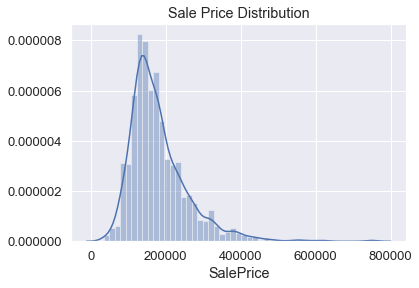

In [53]:
# Let's first analyze our outcome variable

plt.title('Sale Price Distribution')
sns.distplot(y)

print(y.describe())

Takeaways:

1) Not a normal distribution

2) Positive Skewness

3) Shows Kurtosis

In [54]:
# Let's look at the last two

print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


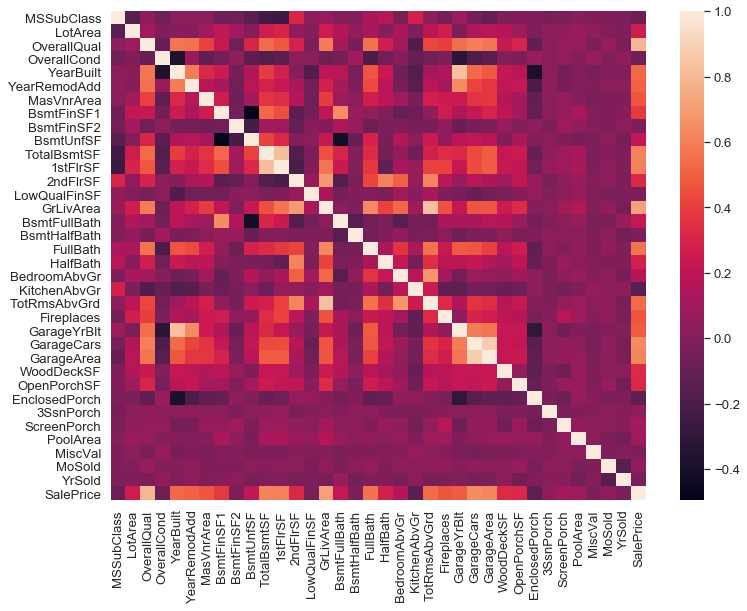

In [55]:
# Alright, let's see how it interacts with our feature variables

X_num_plus_sp = pd.concat([X_num, y], axis =1 )

plt.figure(figsize = (12,9))
corr_matrix = X_num_plus_sp.corr()
sns.heatmap(corr_matrix)

Takeaways:

1) All of the 'Garage...' seem to be very correlated. To avoid multicollinearity, we will remove all but one

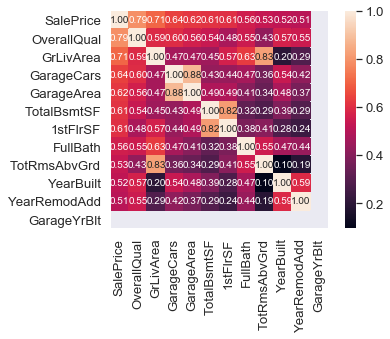

In [56]:
# Let's have a close up with regards to how SalePrice is correlated with particular variables

k = 12 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(X_num_plus_sp[cols].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [57]:
train = train.drop(['GarageCond', 'GarageArea', 'GarageType', 'GarageYrBlt'], axis = 1)

In [58]:
# We can transition over to looking exclusively at the distributions of the feature variables

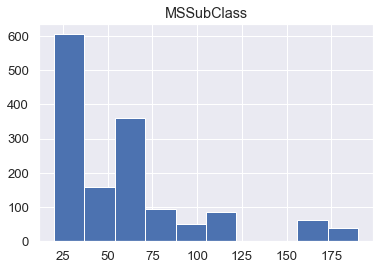

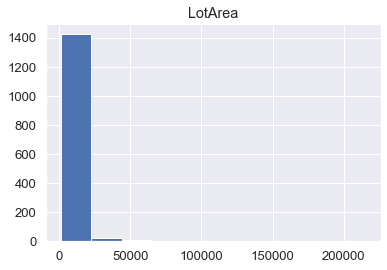

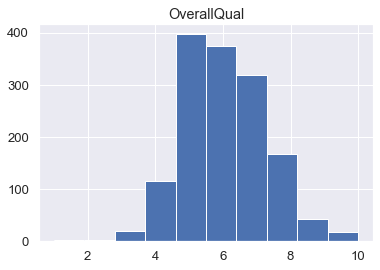

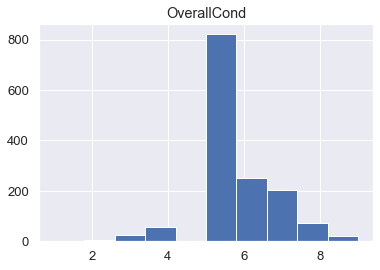

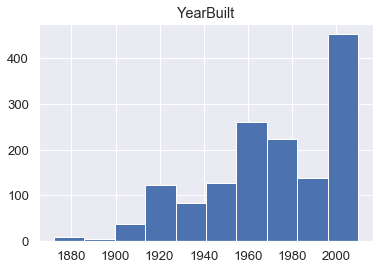

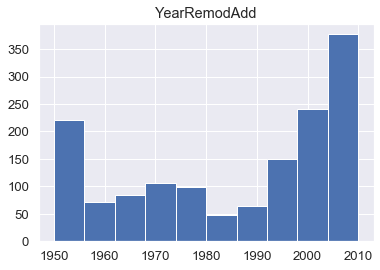

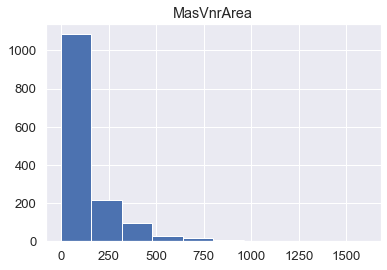

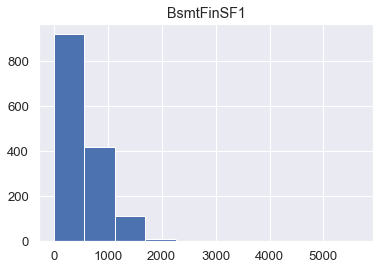

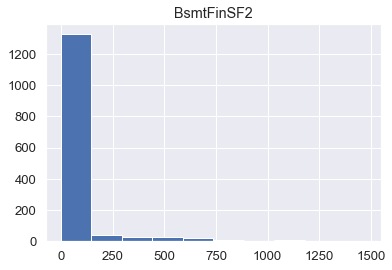

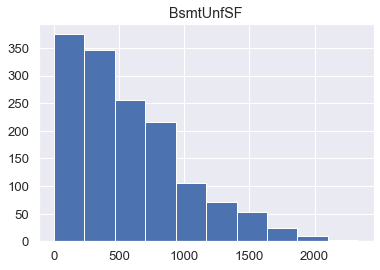

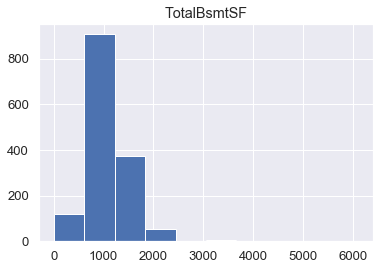

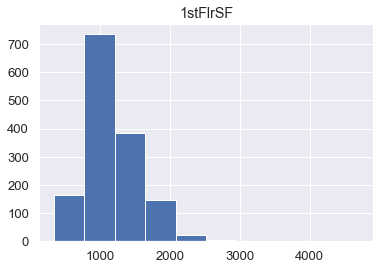

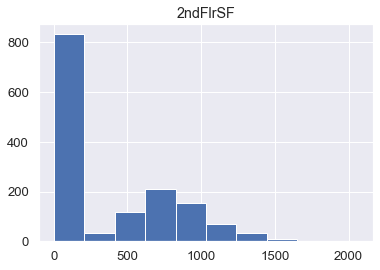

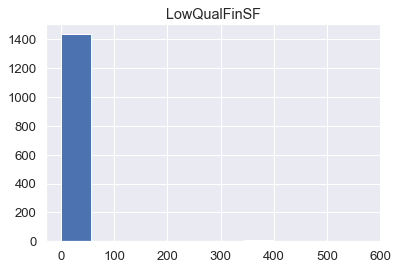

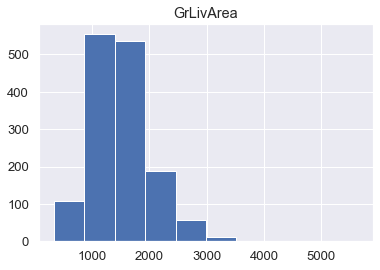

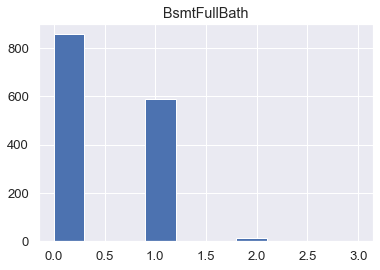

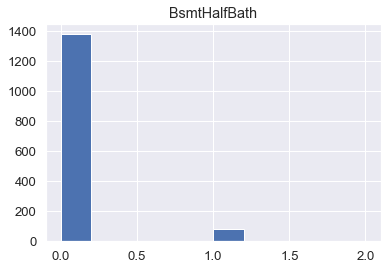

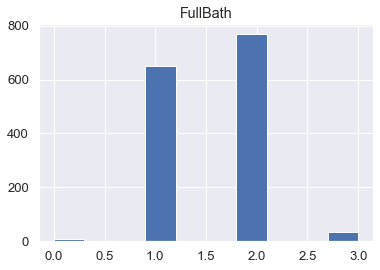

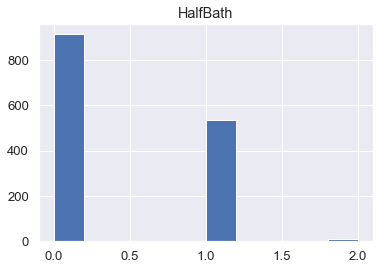

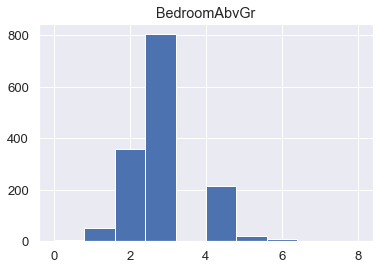

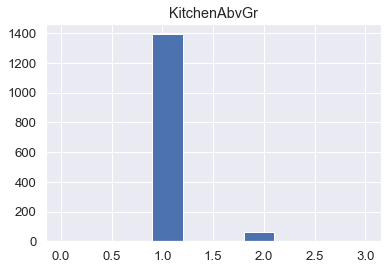

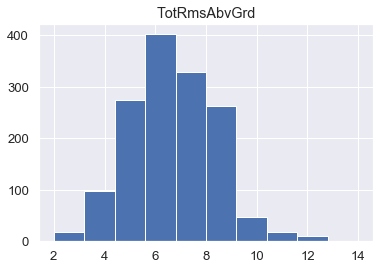

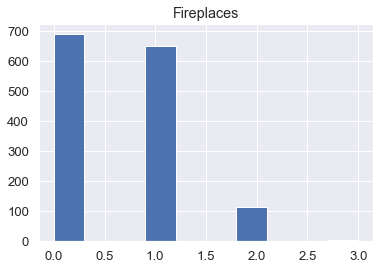

C:\Users\josuy\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\josuy\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


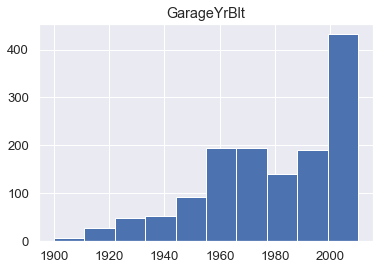

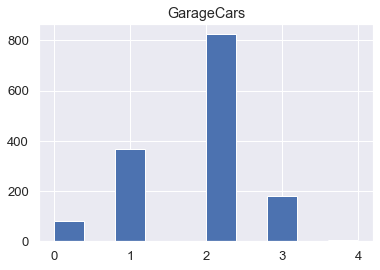

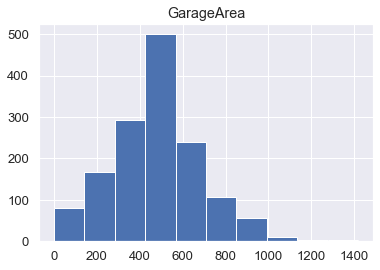

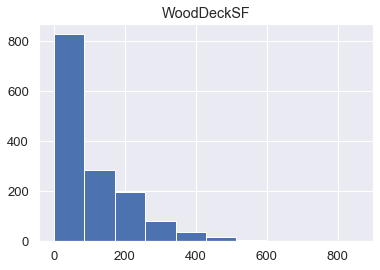

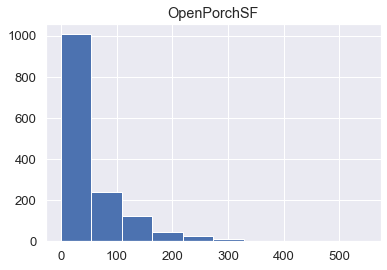

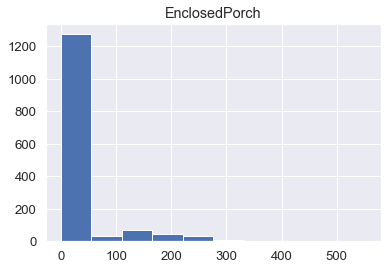

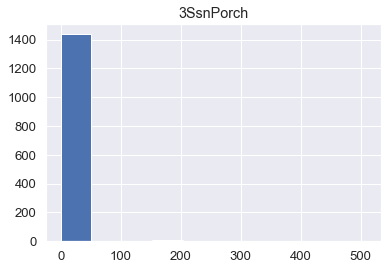

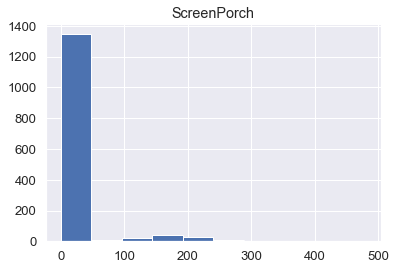

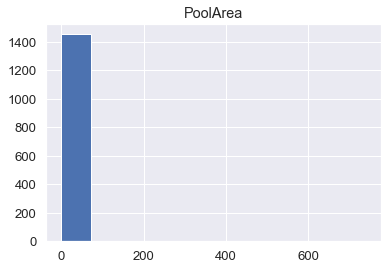

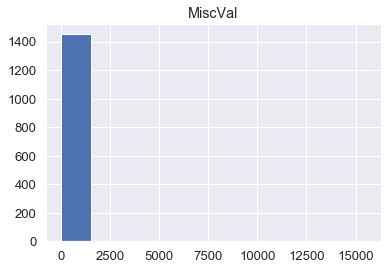

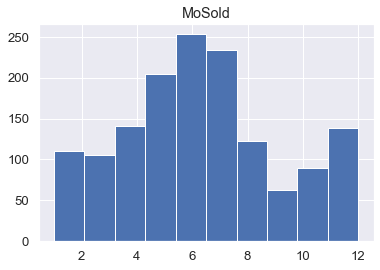

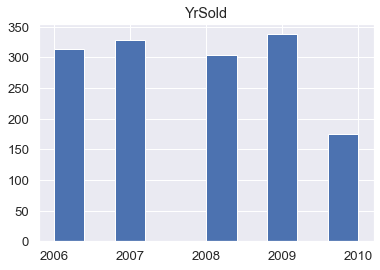

In [59]:
for i in X_num.columns:
    plt.title(i)
    plt.hist(X_num[i])
    plt.show()

Takeaways:

1) Only two features(TotRmsAbvGrd, GarageArea) show a normal distribution

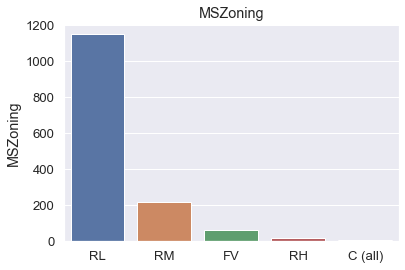

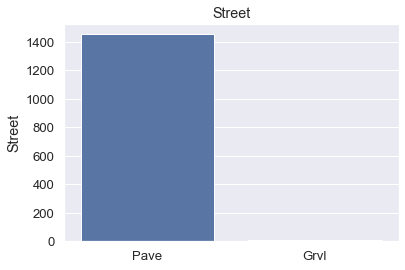

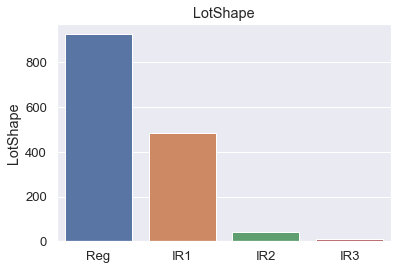

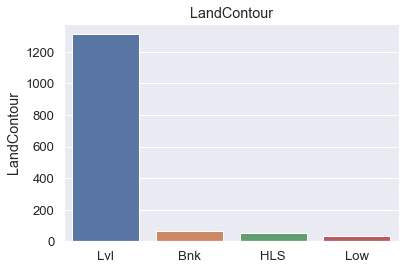

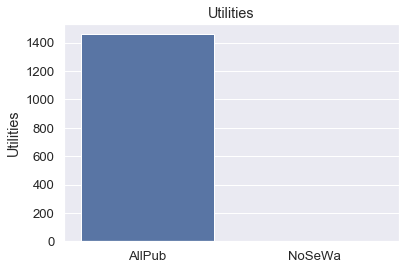

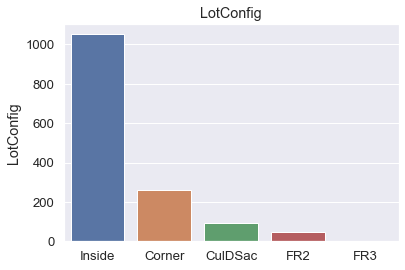

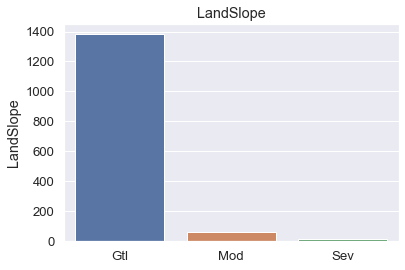

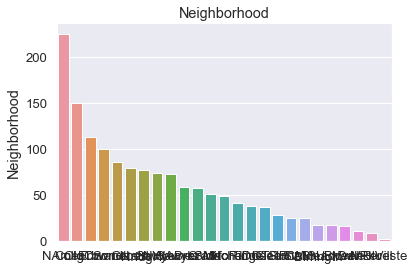

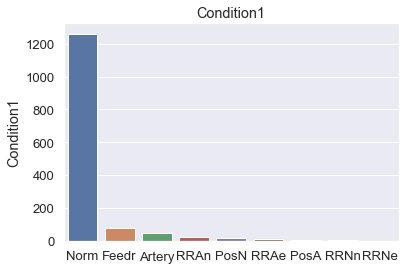

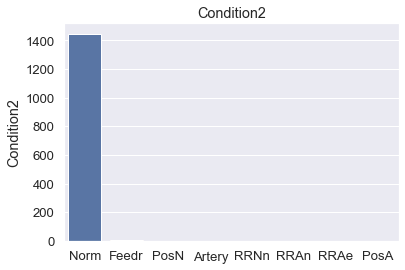

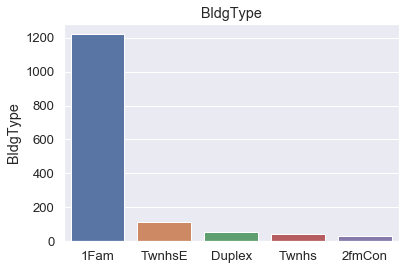

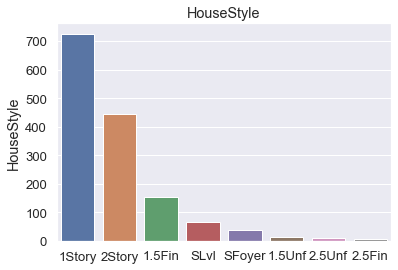

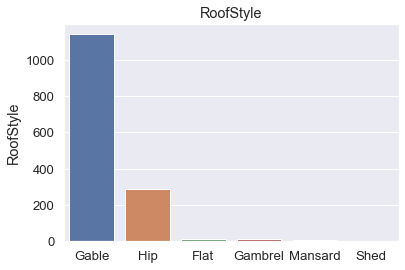

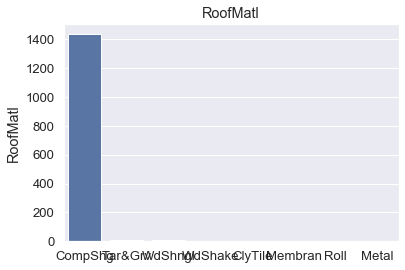

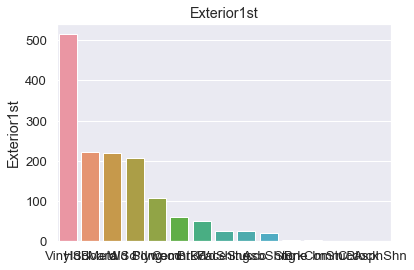

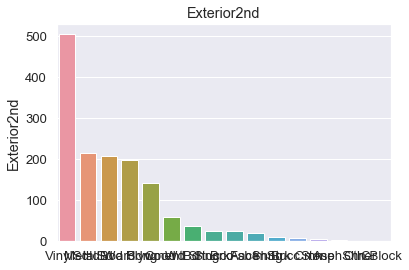

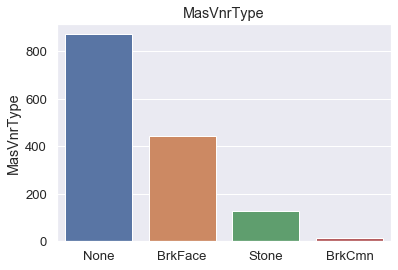

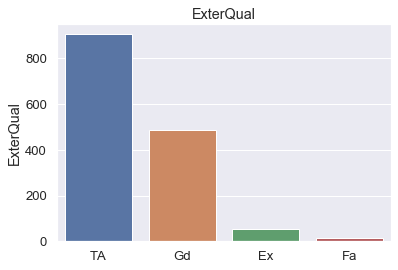

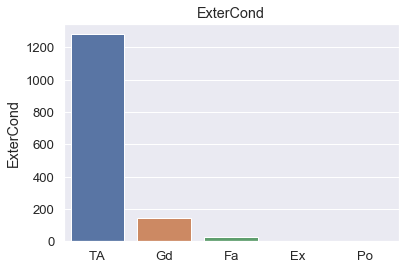

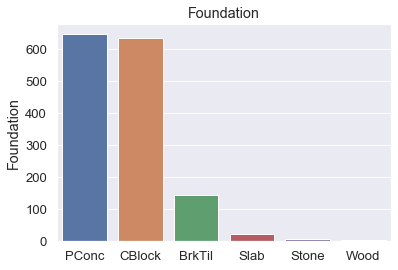

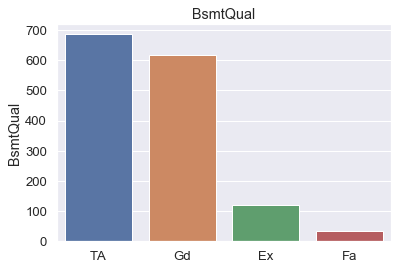

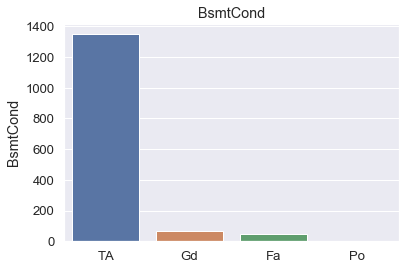

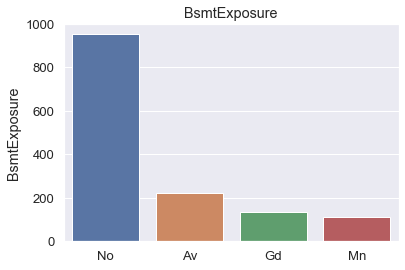

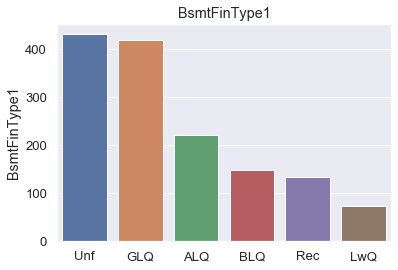

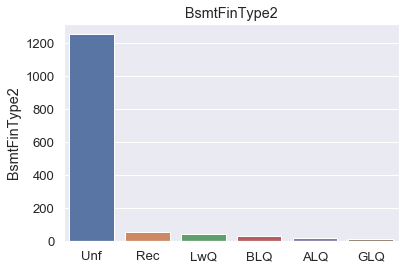

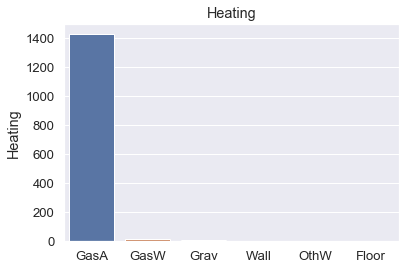

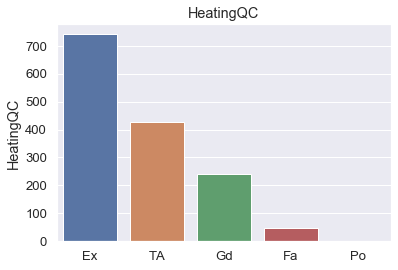

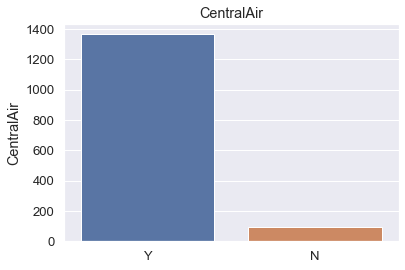

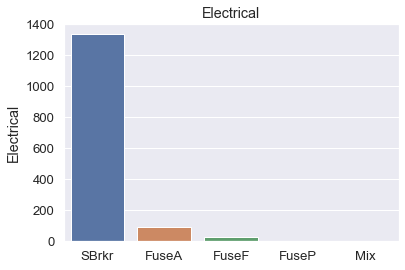

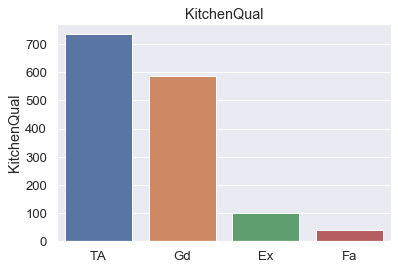

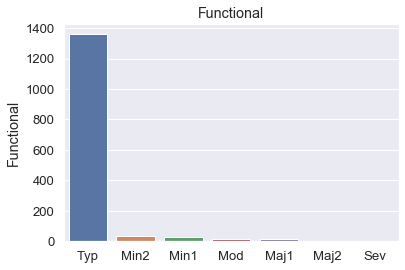

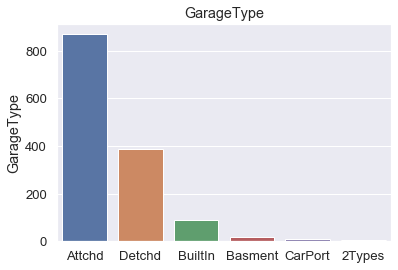

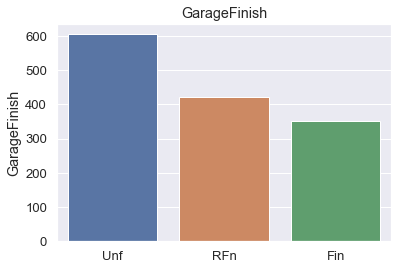

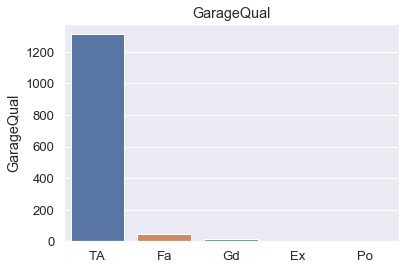

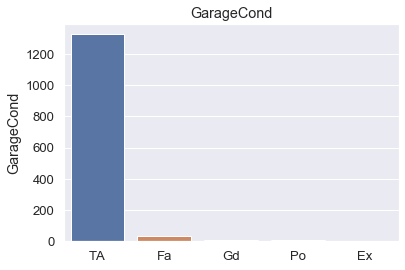

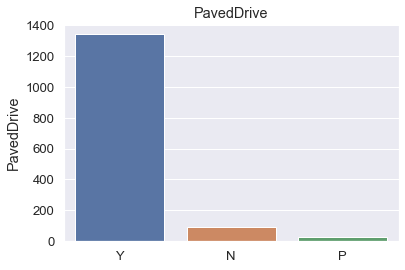

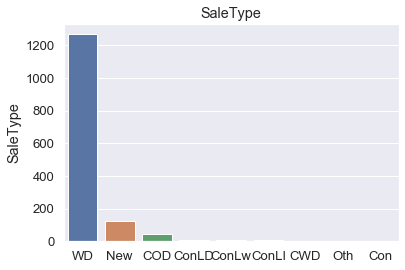

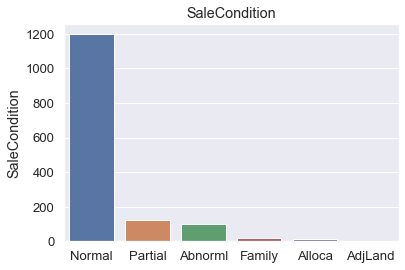

In [60]:
for i in X_cat.columns:
    sns.barplot(X_cat[i].value_counts().index,X_cat[i].value_counts()).set_title(i)
    plt.show()

##### Outliers

In [61]:
# Univariate Analysis

# We will need to standardize the data

from sklearn.preprocessing import StandardScaler

saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


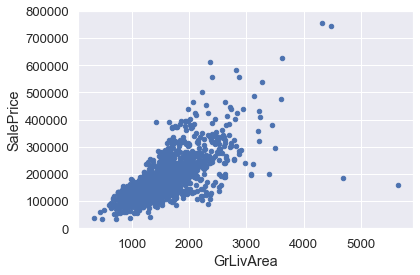

In [62]:
# Bivariate Analysis

var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [63]:
#deleting points
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


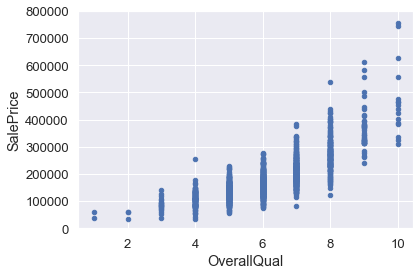

In [64]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# This looks more solid

### Dummy Variables

In [65]:
# Now we can create a function to get our dummy variables

dummy_list = train.select_dtypes(include = 'object')

def obtain_dummies(train, dummy_list):
    for x in dummy_list:
        dummies = pd.get_dummies(train[x], prefix = x, dummy_na = False)
        train = train.drop(x,1)
        train = pd.concat([train, dummies], axis =1)
    return train

In [66]:
train = obtain_dummies(train, dummy_list)
train.drop('SaleType_Oth', axis = 1) # Avoid dummy variable trap
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Columns: 257 entries, Id to SaleCondition_Partial
dtypes: float64(1), int64(34), uint8(222)
memory usage: 726.2 KB


### Feature Selection

In [74]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .05, random_state = 1)

In [75]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
print(sel)

print(train.shape)

sel.fit(train)

sel.transform(train)

print(train.shape)

VarianceThreshold(threshold=0.15999999999999998)
(1458, 257)
(1458, 257)


In [76]:
X = train.drop('SalePrice', axis = 1)
X = X.drop('Id', axis = 1)
y = train['SalePrice']

In [77]:
from sklearn.feature_selection import SelectKBest

# ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Error somehow disappeared

In [78]:
select = SelectKBest(k=20)
selected_features = select.fit(X_train,y_train)
indices_selected = selected_features.get_support(indices = True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

C:\Users\josuy\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [79]:
print(colnames_selected)

['LotArea', 'OverallQual', 'GrLivArea', 'MiscVal', 'LotShape_IR3', 'Neighborhood_NridgHt', 'Condition2_PosN', 'Condition2_RRAn', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'ExterQual_Ex', 'ExterCond_Po', 'BsmtQual_Ex', 'BsmtCond_Po', 'Heating_Floor', 'KitchenQual_Ex', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Alloca', 'SaleCondition_Partial']


### Model

In [80]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_selected,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
# Score the Linear Regression Model

lr.score(X_test_selected, y_test)

0.8659040120917965

In [94]:
# Decision Tree

from sklearn import tree

dtr = tree.DecisionTreeRegressor()

dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [98]:
dtr.score(X_test, y_test)

# Performed much better when I did not choose the features for it

0.7810718184416868

### Model Using Unprocessed Data

In [84]:
# Drop missing values so model does not throw any error
train_unprocessed = train
train_unprocessed = train_unprocessed.dropna(axis=0, how='any')
print(train.shape)
print(train_unprocessed.shape)

(1458, 257)
(1458, 257)


In [85]:
# Remove non-numeric columns so model does not throw an error
for col_name in train_unprocessed.columns:
    if train_unprocessed[col_name].dtypes not in ['int32','int64','float32','float64']:
        train_unprocessed = train_unprocessed.drop(col_name, 1)

In [86]:
# Split X and y

X_unprocessed = train_unprocessed.drop('SalePrice',axis = 1)
y_unprocessed = train_unprocessed['SalePrice']

In [87]:
X_unprocessed.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,2,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,2,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,2,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,3,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,3,192,84,0,0,0,0,0,12,2008


In [88]:
# Split unprocessed data into train and test set
# Build model and assess performance
X_train_unprocessed, X_test_unprocessed, y_train_unprocessed, y_test_unprocessed = train_test_split(X_unprocessed, y_unprocessed, test_size=0.05, random_state=1)

In [89]:
# Linear Regression

lr_unprocessed = LinearRegression()

lr_unprocessed.fit(X_train_unprocessed, y_train_unprocessed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
lr_unprocessed.score(X_test_unprocessed, y_test_unprocessed)

0.8656384651940456

In [91]:
# Decision Tree

dtr_unprocessed = tree.DecisionTreeRegressor()

dtr_unprocessed.fit(X_train_unprocessed, y_train_unprocessed)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [92]:
dtr_unprocessed.score(X_test_unprocessed, y_test_unprocessed)

0.7620136405772607